# Undecimated isotropic wavelet transform, aka the starlet
Thomas Bordier

In [1]:
%matplotlib inline

/Users/Thomas/anaconda/envs/social/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import matplotlib.pyplot as plt
import pyfits
import numpy as np

# Utils contains the codes for the filter, the forward TF and the backward TF
from utils import forWaveTF, backWaveTF

In [23]:
# Defining filter
center = 256/2
filtre = np.array([0]*256)
filtre[center-2] = 1
filtre[center-1] = 4
filtre[center] = 6
filtre[center+1] = 4
filtre[center+2] = 1
filtre = filtre/16.

# Illustration and validation


#### Dirac

In [40]:
img = np.zeros((256,256))
img[256/2,256/2] = 1.

Forward wavelet transform

In [41]:
J = 6
c, w = forWaveTF(img,filtre,J)

Plotting wavelets

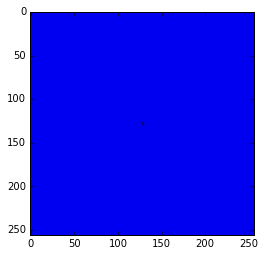

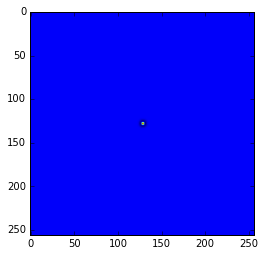

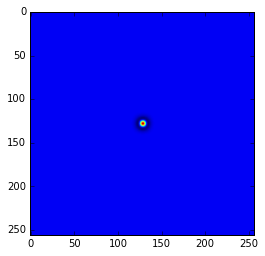

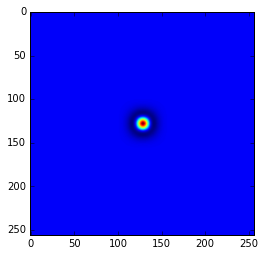

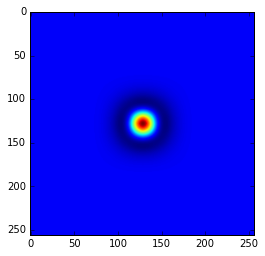

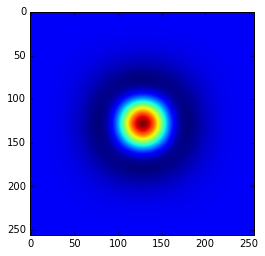

In [43]:
for k in range(1,w.shape[0]):
    plt.figure(figsize=(4,4))
    plt.imshow(w[k])

In [44]:
# Checking the mean of wavelets
[np.mean(wav) for wav in w[1:]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

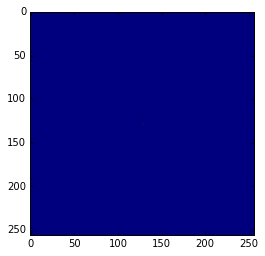

In [46]:
# Reconstruction of dirac summing all scales
recon = backWaveTF(c,w)

# Plotting reconstruction of dirac.
plt.figure(figsize=(4,4))
plt.imshow(recon)

In [47]:
recon[256/2,256/2]

1.0

#### Galaxy NGC2997

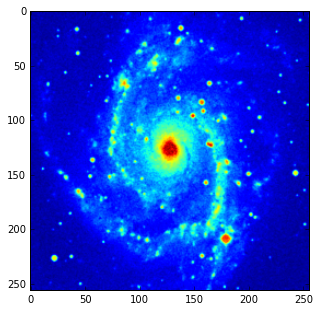

In [24]:
# Import image
ngc2997 = pyfits.open('ngc2997.fits')
img = ngc2997[0].data
plt.figure(figsize=(5,5))
plt.imshow(img)

Forward wavelet transform

In [11]:
J = 6
c, w = forWaveTF(img,filtre,J)

Plotting wavelets

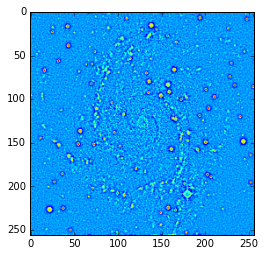

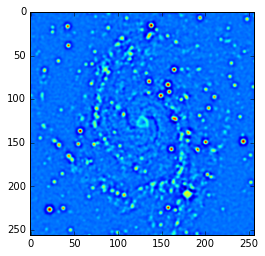

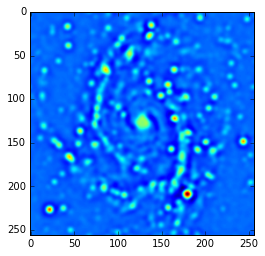

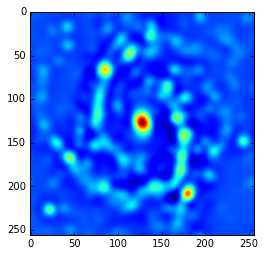

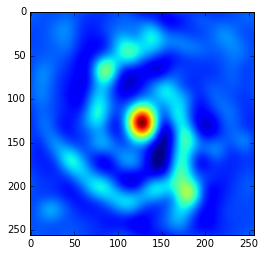

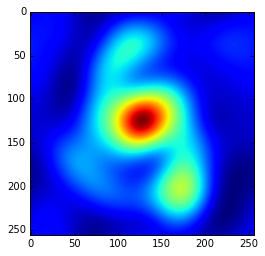

In [27]:
for k in range(1,w.shape[0]):
    plt.figure(figsize=(4,4))
    plt.imshow(w[k])

In [19]:
# Checking the mean of wavelets
[np.mean(wav) for wav in w[1:]]

[0.0, -2.9802322e-08, -6.7055225e-08, 0.0, -2.3841858e-07, -4.7683716e-07]

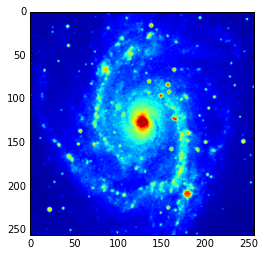

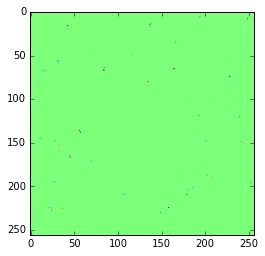

In [32]:
# Reconstruction of galaxy summing all scales
recon = backWaveTF(c,w)

# Plotting reconstruction of galaxy.
plt.figure(figsize=(4,4))
plt.imshow(recon)
# Plotting the difference between the original image and reconstruction. We can see non zero
# values which are most likely due to numerical approximations. 
plt.figure(figsize=(4,4))
plt.imshow(img-recon)

In [33]:
img-recon

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

# Coefficient normalization

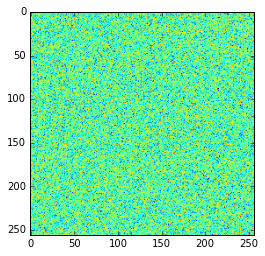

In [52]:
img = np.random.randn(256,256)
plt.imshow(img)

In [54]:
J = 6
c, w = forWaveTF(img,filtre,J)

Plotting wavelets

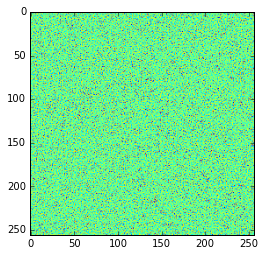

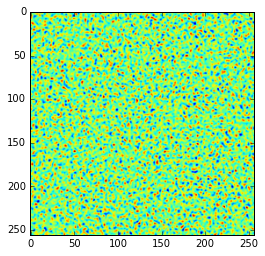

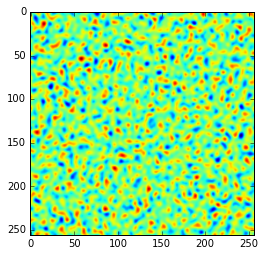

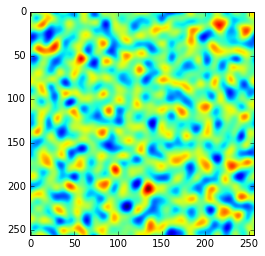

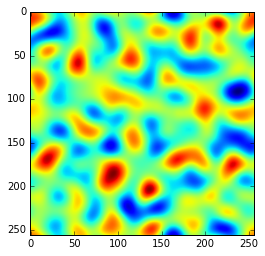

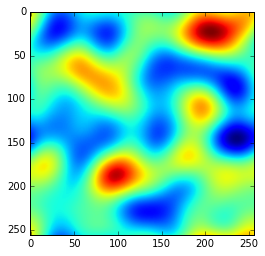

In [55]:
for k in range(1,w.shape[0]):
    plt.figure(figsize=(4,4))
    plt.imshow(w[k])

Computing standard deviation for every wavelet, remember w[0] is the original image and not a wavelet! So the first value should be one

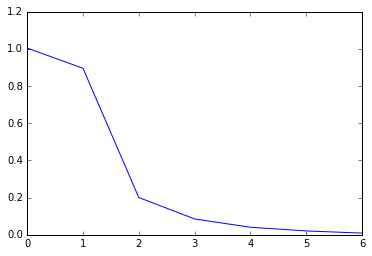

In [59]:
# Evolution of the standard deviation with the wavelet scale
plt.plot([np.std(wav) for wav in w])

Obviously the std is not the same at every scale